In [5]:
from sqlalchemy import create_engine
from sqlalchemy.orm import sessionmaker, declarative_base
import pandas as pd

In [6]:

SQLALCHEMY_DATABASE_URL = <INSERT TOKEN>

engine = create_engine(SQLALCHEMY_DATABASE_URL)
SessionLocal = sessionmaker(autocommit=False, autoflush=False, bind=engine)

Base = declarative_base()

In [7]:
user_data_select = "SELECT * FROM public.user_data" 
user_data = pd.read_sql(user_data_select, engine)

In [8]:
user_data.head(5)

,user_id,gender,age,country,city,exp_group,os,source
0,200,1,34,Russia,Degtyarsk,3,Android,ads
1,201,0,37,Russia,Abakan,0,Android,ads
2,202,1,17,Russia,Smolensk,4,Android,ads
3,203,0,18,Russia,Moscow,1,iOS,ads
4,204,0,36,Russia,Anzhero-Sudzhensk,3,Android,ads


In [9]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163205 entries, 0 to 163204
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   user_id    163205 non-null  int64 
 1   gender     163205 non-null  int64 
 2   age        163205 non-null  int64 
 3   country    163205 non-null  object
 4   city       163205 non-null  object
 5   exp_group  163205 non-null  int64 
 6   os         163205 non-null  object
 7   source     163205 non-null  object
dtypes: int64(4), object(4)
memory usage: 10.0+ MB


In [10]:
user_data.source.unique()

array(['ads', 'organic'], dtype=object)

Информация о пользователях представляет собой:
- user_id - уникальный индентификатор пользовотеля. Целочисленные значения от 200 до примерно 170 тысяч
- gender - пол пользовотеля. Бинарное значение
- age -  возраст пользователя. Целочисленное значение от 14 до 95
- country - страна пользователя. 11 уникальных значений заданных строкой
- city - город пользователя. 3915 уникальных значений заданных строкой
- exp_group - эксперементальная группа полльзователя. Для наших целей не имеет смысла
- os - операционная система пользователя. Бинарное значение
- source - способ, которым пользователь попал в приложение. Бинарное значение
  
Пропущенных значений таблица не имеет

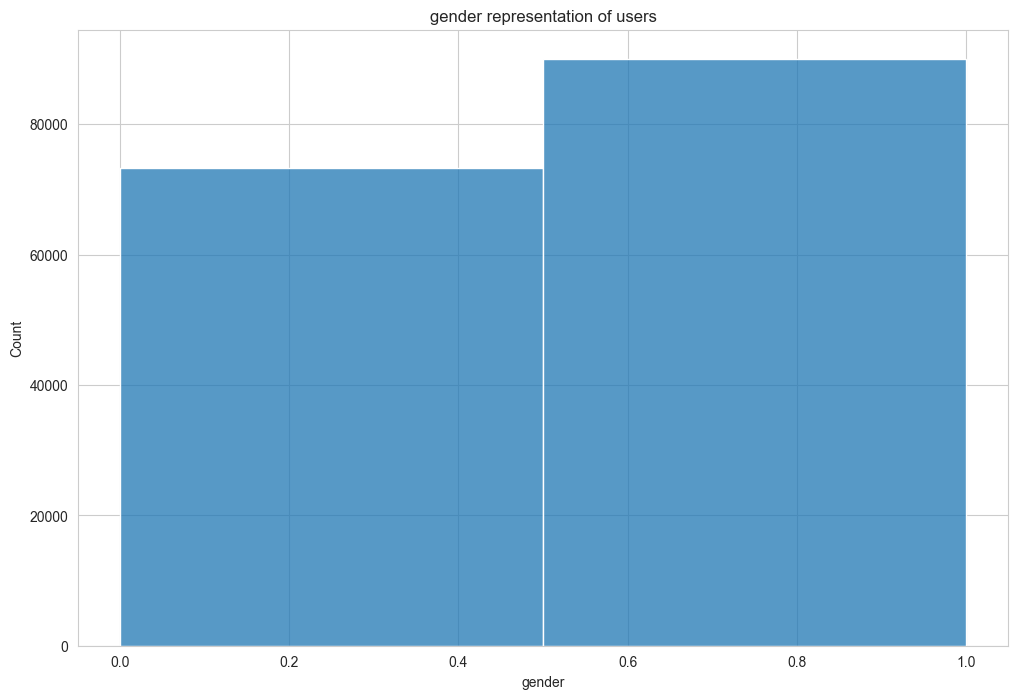

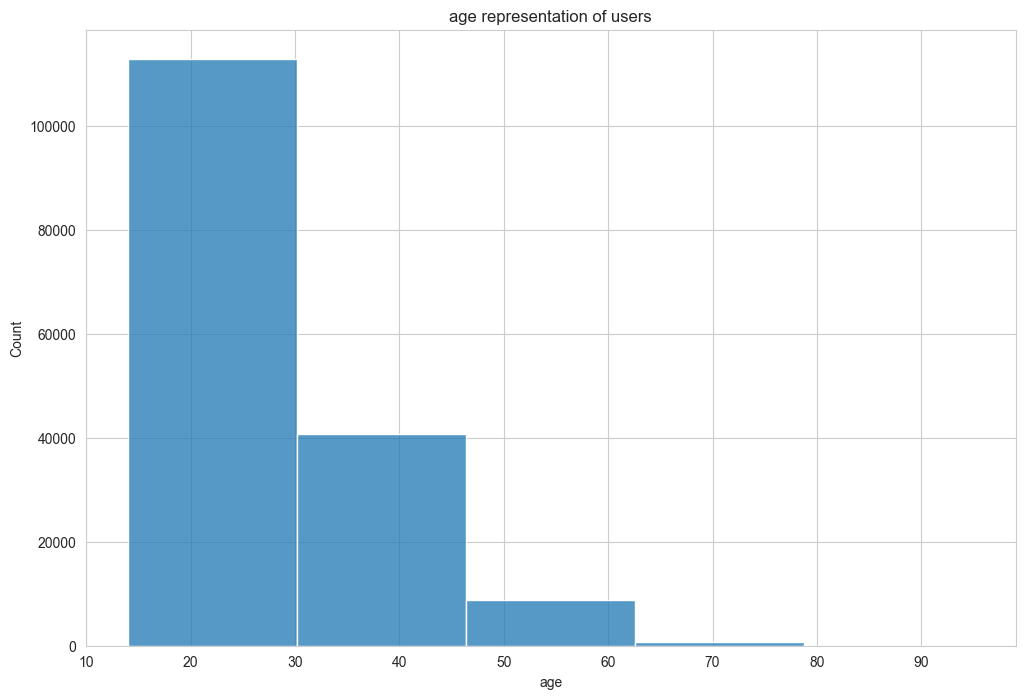

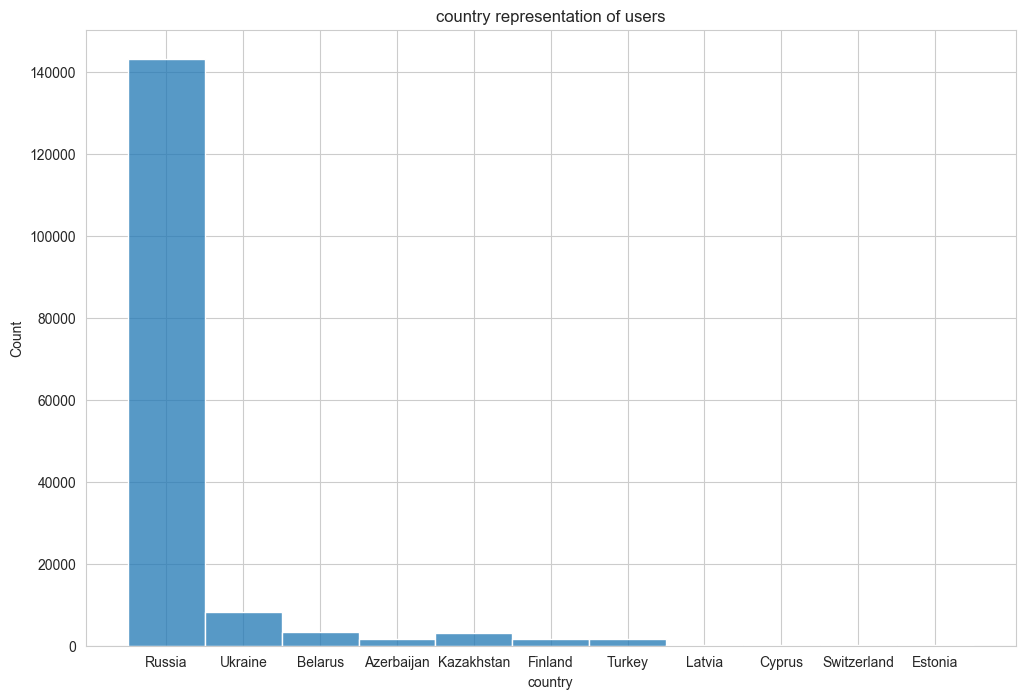

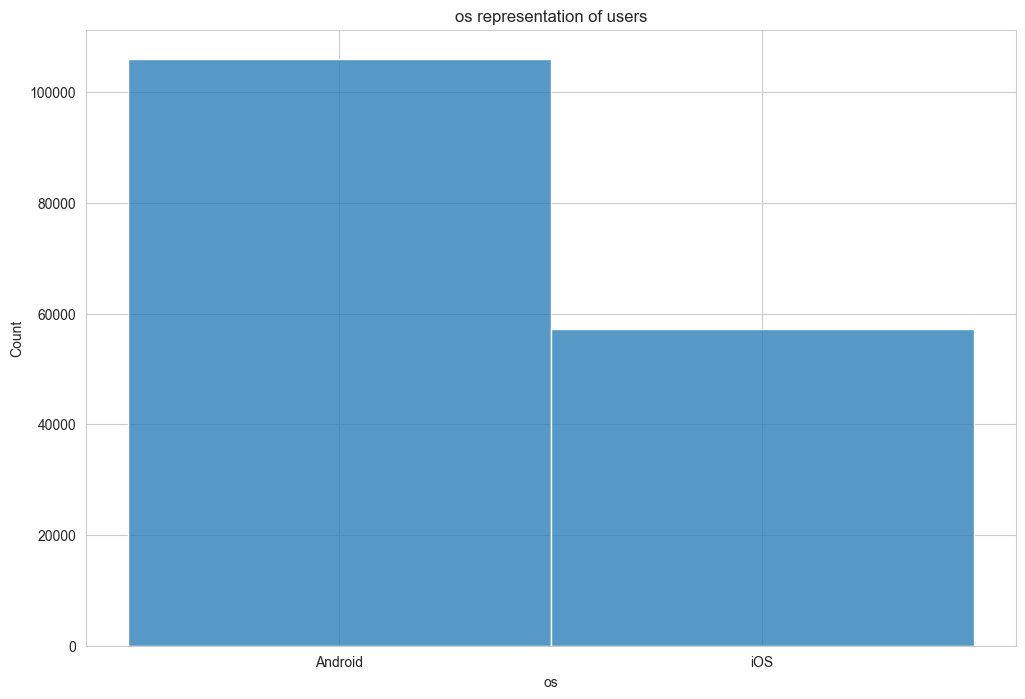

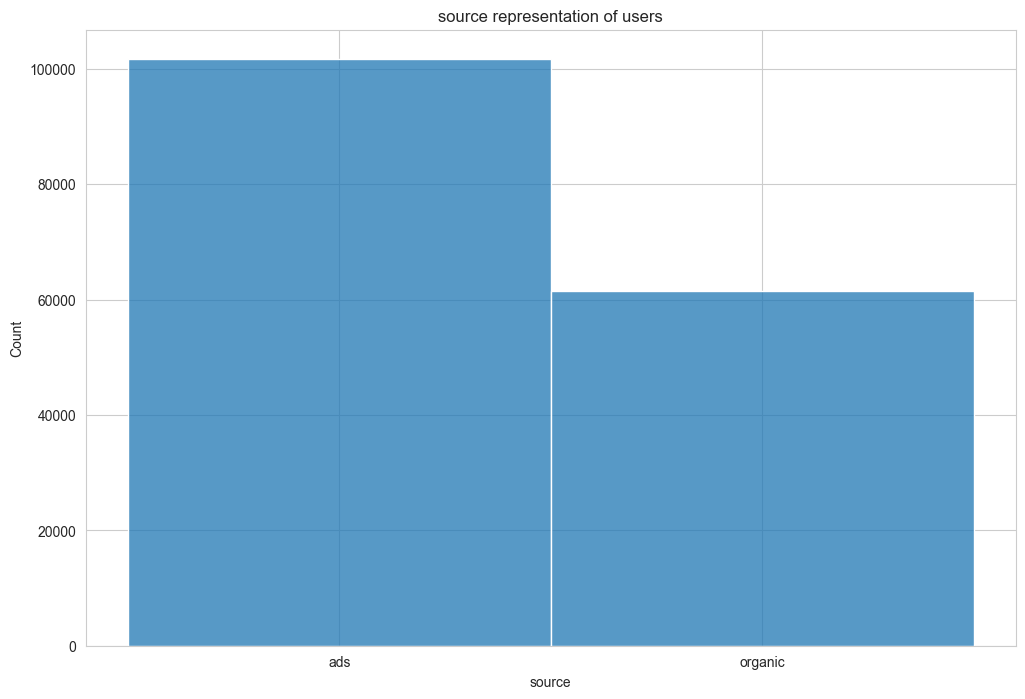

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = [12, 8]

user_columns = {"gender": 2, "age": 5, "country": 11, "os": 2, "source": 2}

for column in user_columns.keys():
    plt.figure(figsize=(12, 8))
    sns.histplot(user_data[column], bins=user_columns[column])
    plt.title(f"{column} representation of users")

Видно, что средний пользователь это мужчина до 30 лет из России пользующийся платформой Android пришедший через рекламу

In [12]:
post_text_select = "SELECT * FROM public.post_text_df" 
post_text_data = pd.read_sql(post_text_select, engine)

In [13]:
post_text_data.head(5)

,post_id,text,topic
0,1,UK economy facing major risks\n\nThe UK manufa...,business
1,2,Aids and climate top Davos agenda\n\nClimate c...,business
2,3,Asian quake hits European shares\n\nShares in ...,business
3,4,India power shares jump on debut\n\nShares in ...,business
4,5,Lacroix label bought by US firm\n\nLuxury good...,business


In [14]:
post_text_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7023 entries, 0 to 7022
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   post_id  7023 non-null   int64 
 1   text     7023 non-null   object
 2   topic    7023 non-null   object
dtypes: int64(1), object(2)
memory usage: 164.7+ KB


In [15]:
post_text_data["text"] = post_text_data["text"].str.replace("\n\n", " ").str.replace("\n", " ") # замена для более корректного подсчёта слов
post_text_data["text_lenght"] = post_text_data["text"].str.split().str.len()
post_text_data.head(1)

,post_id,text,topic,text_lenght
0,1,UK economy facing major risks The UK manufactu...,business,324


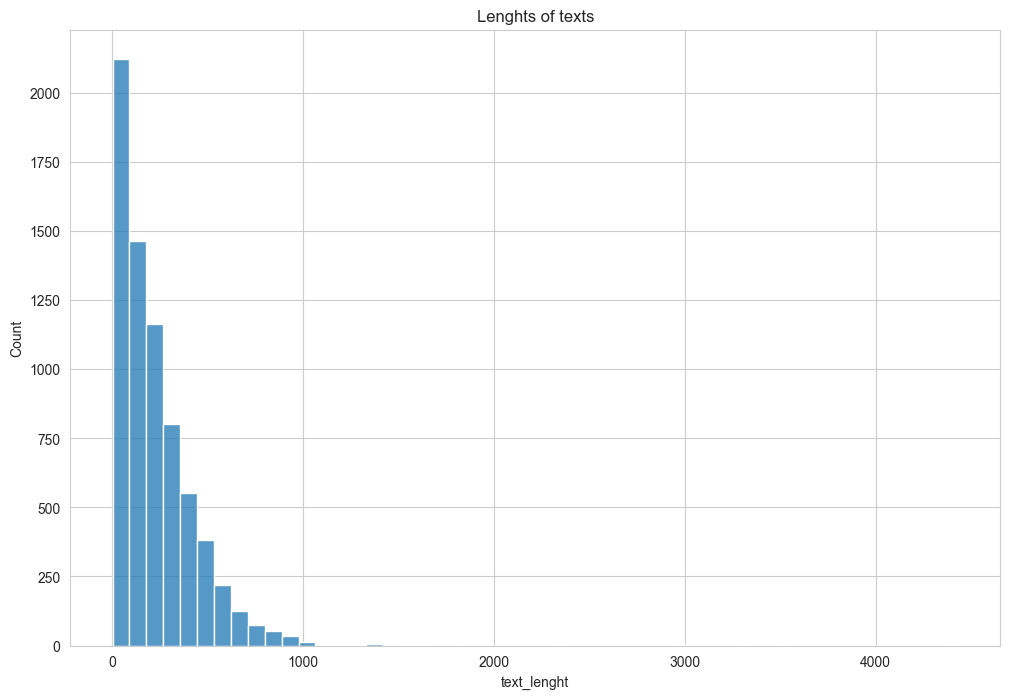

In [16]:
sns.histplot(post_text_data.text_lenght, bins=50)
plt.title(f"Lenghts of texts")
plt.show()

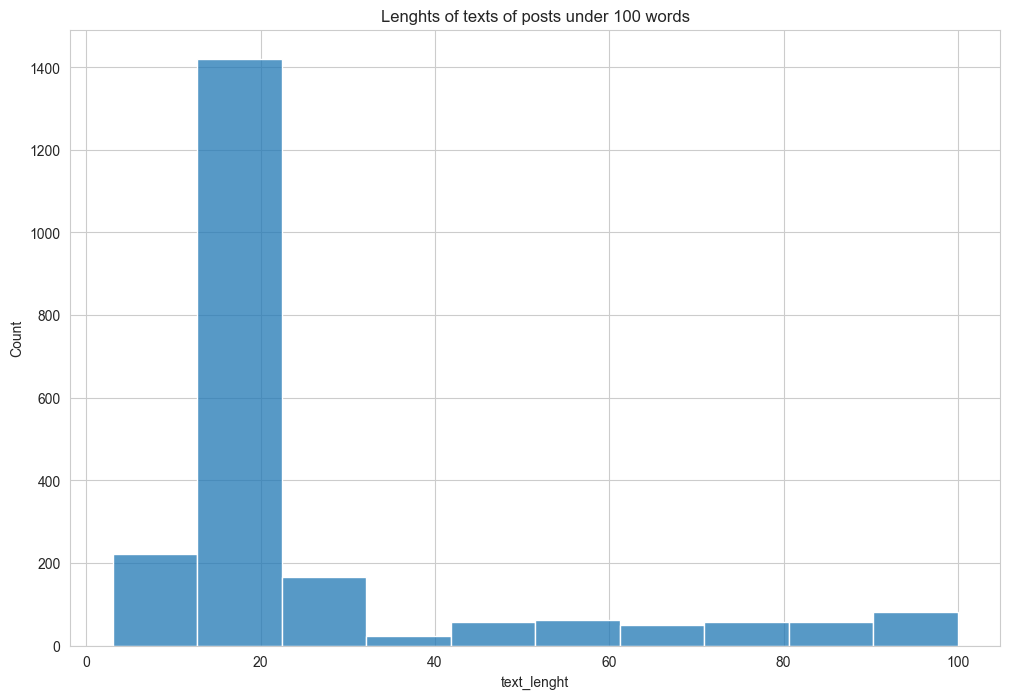

In [17]:
less_hundred = post_text_data[post_text_data["text_lenght"] <= 100]
sns.histplot(less_hundred["text_lenght"], bins=10)
plt.title(f"Lenghts of texts of posts under 100 words")
plt.show()

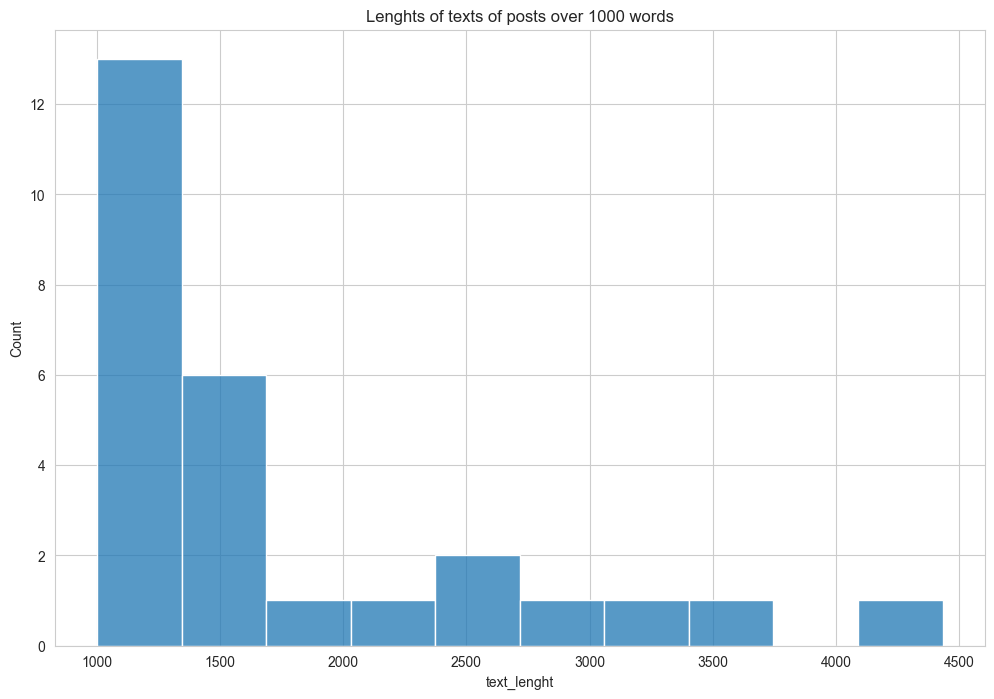

In [18]:
more_thousand = post_text_data[post_text_data["text_lenght"] >= 1000]
sns.histplot(more_thousand["text_lenght"], bins=10)
plt.title(f"Lenghts of texts of posts over 1000 words")
plt.show()

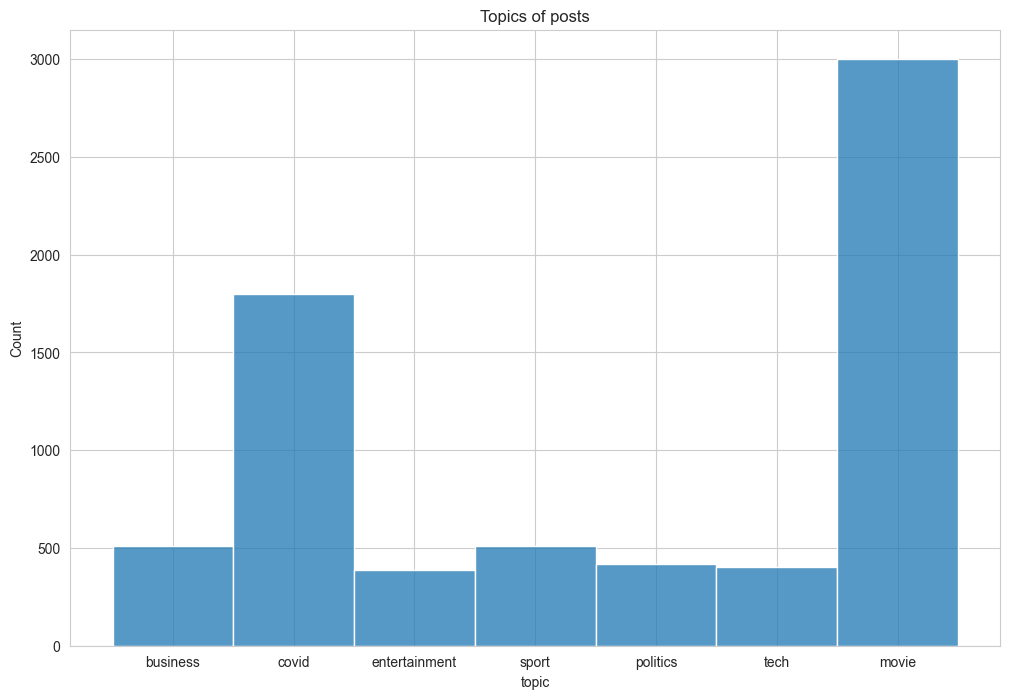

In [19]:
sns.histplot(post_text_data["topic"])
plt.title(f"Topics of posts")
plt.show()

Видно, что большинство постов короткие (не более 20 слов). Также самыми популярными темами постов являются ковид и фильмы. Расммотрим зависимость длины постов от тем

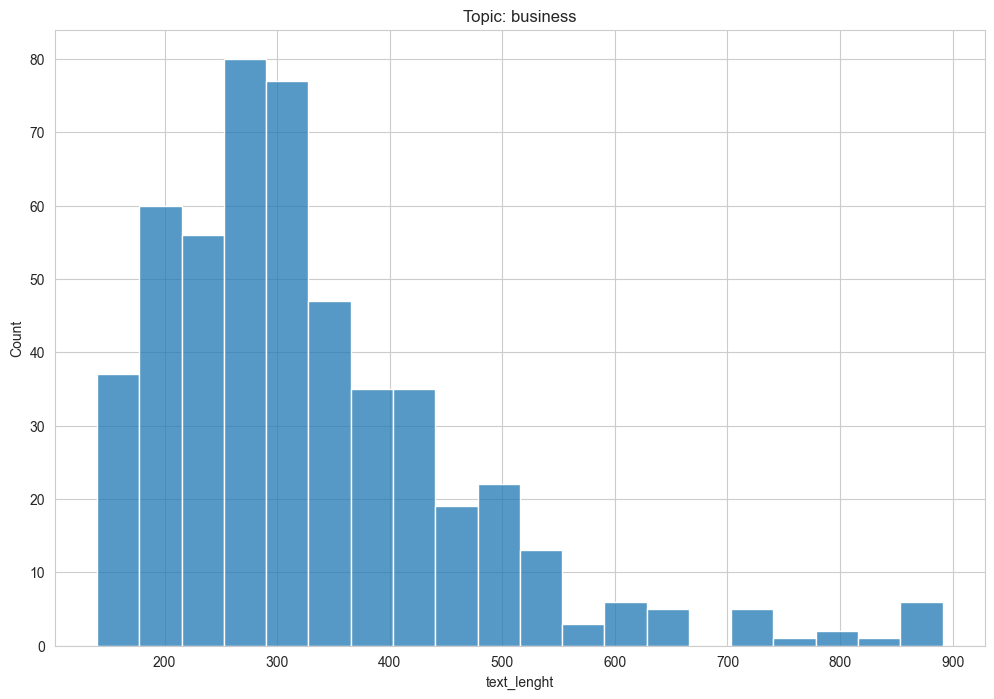

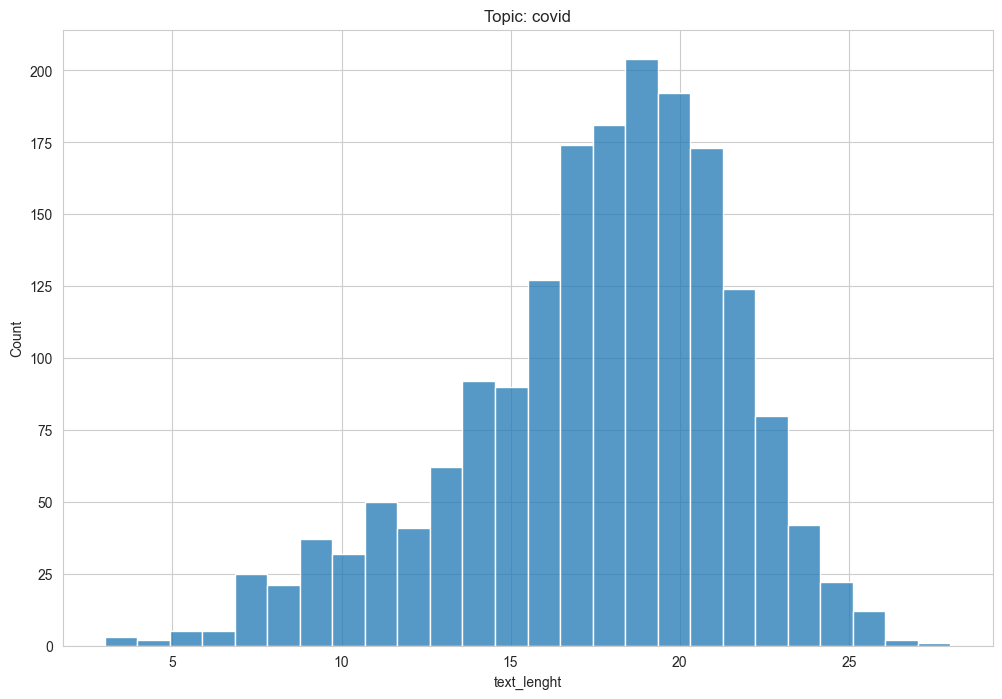

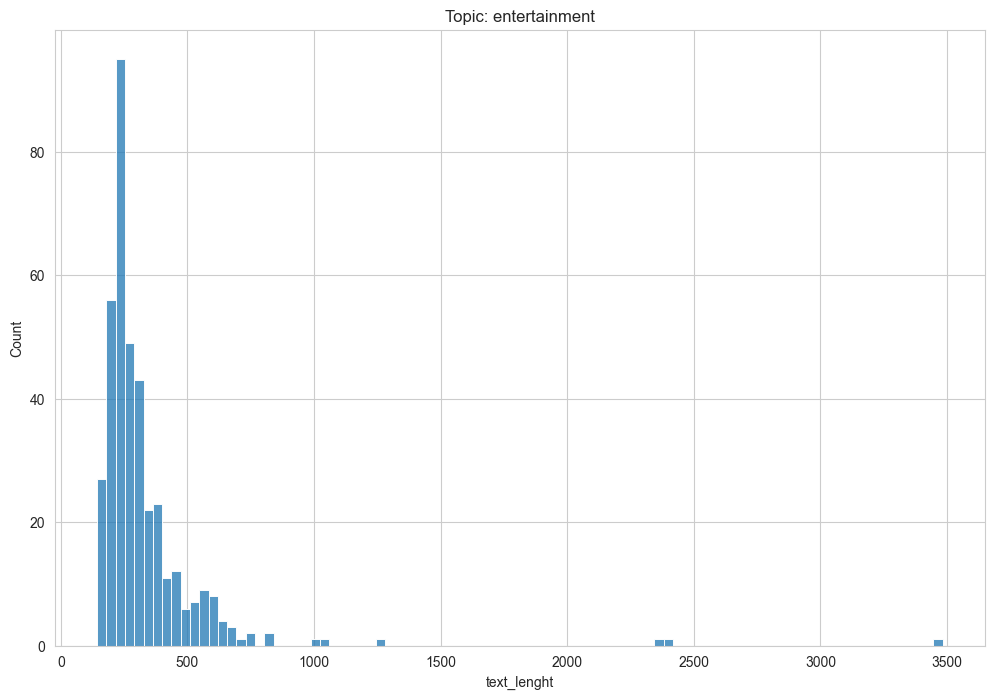

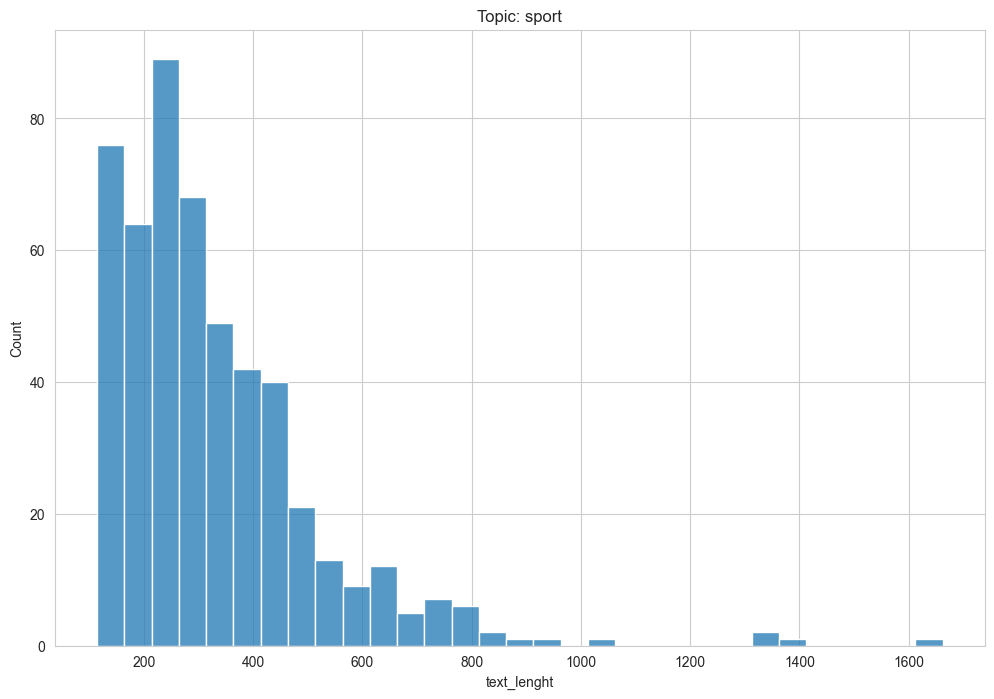

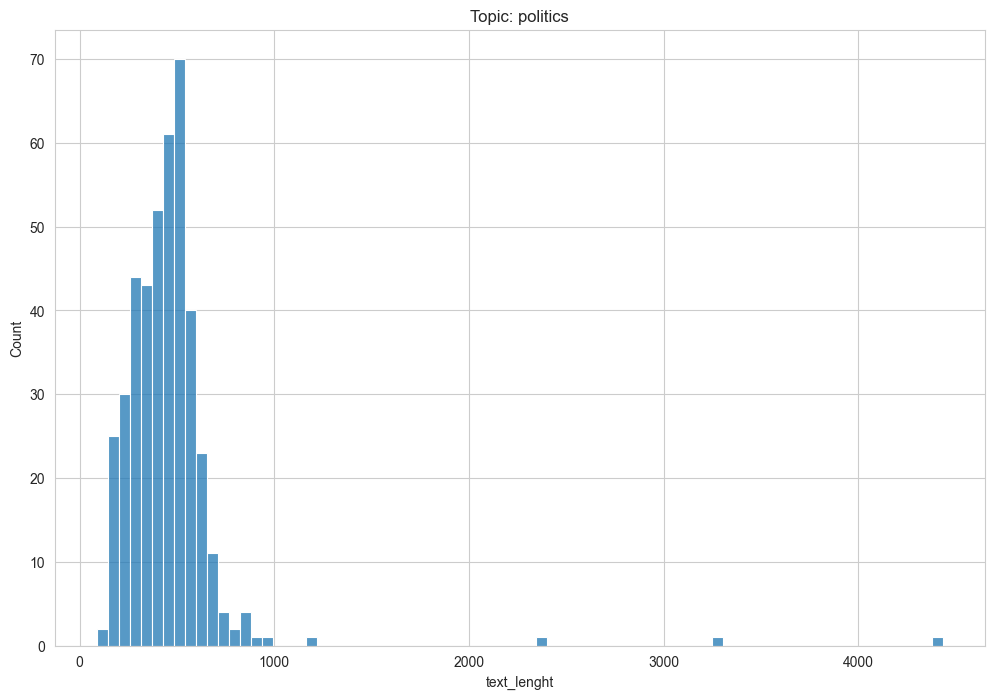

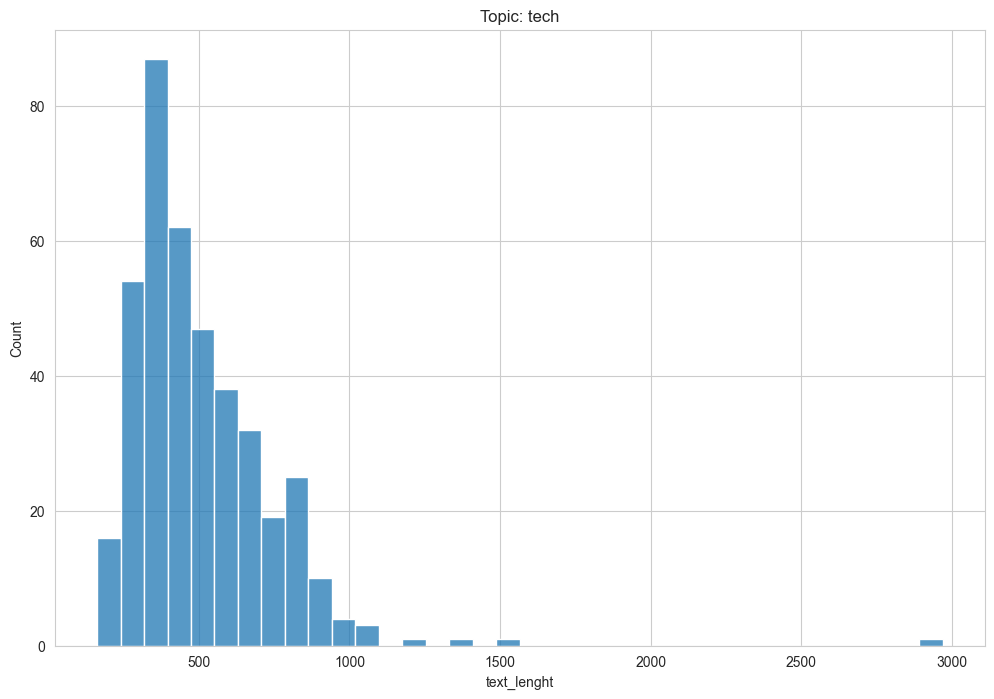

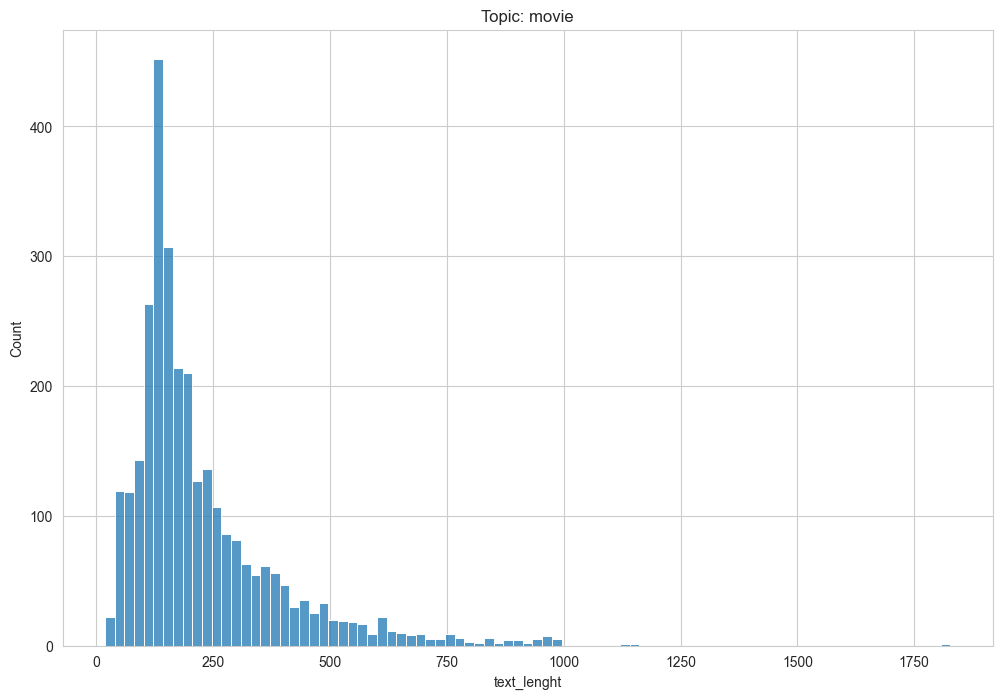

In [20]:
topics = post_text_data.topic.unique()
for topic in topics:
    df = post_text_data[post_text_data.topic == topic]
    plt.figure(figsize=(12, 8))
    sns.histplot(df.text_lenght)
    plt.title(f"Topic: {topic}")

In [21]:
feed_data_select = """
    SELECT * FROM public.feed_data WHERE action != 'like' 
LIMIT 5000000"""
feed_data = pd.read_sql(feed_data_select, engine)

In [22]:
feed_data.head(3)

,timestamp,user_id,post_id,action,target
0,2021-12-11 11:42:20,127771,4936,view,0
1,2021-12-11 11:43:34,127771,7130,view,0
2,2021-12-11 11:45:26,127771,6257,view,0


In [23]:
feed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000000 entries, 0 to 4999999
Data columns (total 5 columns):
 #   Column     Dtype         
---  ------     -----         
 0   timestamp  datetime64[ns]
 1   user_id    int64         
 2   post_id    int64         
 3   action     object        
 4   target     int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 190.7+ MB


In [24]:
feed_data.describe()

,user_id,post_id,target
count,5.000000e+06,5.000000e+06,5.000000e+06
mean,8.845385e+04,3.393916e+03,1.194598e-01
std,4.922660e+04,2.094893e+03,3.243288e-01
min,6.240000e+02,1.000000e+00,0.000000e+00
25%,4.160400e+04,1.524000e+03,0.000000e+00
50%,9.957500e+04,3.188000e+03,0.000000e+00
75%,1.283760e+05,5.202000e+03,0.000000e+00
max,1.620110e+05,7.319000e+03,1.000000e+00


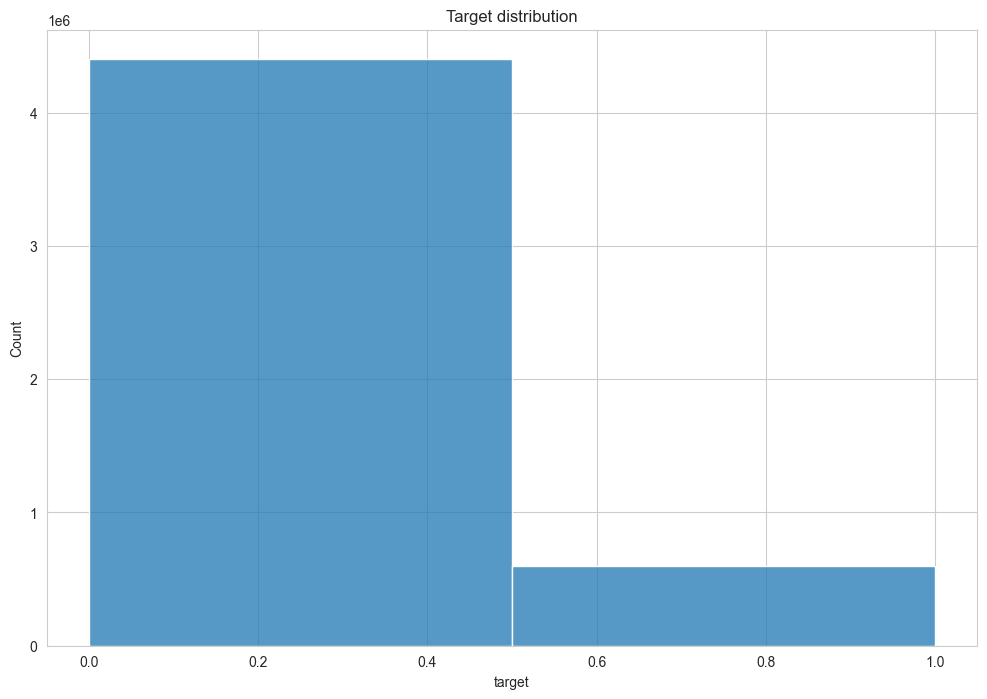

In [25]:
sns.histplot(feed_data["target"], bins=2)
plt.title(f"Target distribution")
plt.show()

Видно, что таргет сильно несбалансирован. Так как на самом деле наш feed_data сильно больше, чем мы загрузили, то просто поставим такое условие при запросе, чтобы классы были сбалансированны для обучающей выборки

Таблица действий пользователей не очень репрезентативна. Поэтому нерлохо было бы объеденить её с предыдущими

In [26]:
def merge_data(user_data: pd.DataFrame, post_data: pd.DataFrame, feed_data: pd.DataFrame) -> pd.DataFrame:
    merged = pd.merge(feed_data, user_data, on="user_id", how=("left"))
    merged = pd.merge(merged, post_data, on="post_id", how=("left"))
    return merged

In [27]:
feed_data = feed_data[feed_data["action"] != "like"] # Так как таргет располагается только в строках где действие == view, 
# а затем добаляется запись с действие == like. Поэтому строки с лайками нам на самом деле не нужны
pivot_table = merge_data(user_data, post_text_data, feed_data)
columns_to_drop = ["timestamp", "user_id", "post_id", "text_lenght", "action", "city", "text", "topic", "os", "source"] # эти строки невозможно/трудно скоррелировать с таргетом
tmp = pd.get_dummies(pivot_table["country"], prefix="country", drop_first=True)
pivot_table = pivot_table.drop("country", axis=1)
pivot_table = pd.concat([pivot_table, tmp], axis=1) 
tmp = pd.get_dummies(pivot_table["topic"], prefix="topic", drop_first=True)
pivot_table = pd.concat([pivot_table, tmp], axis=1)
pivot_table = pivot_table.drop(columns=columns_to_drop)
pivot_table["gender"] = pivot_table["gender"].astype(bool)
pivot_table.head(3)

,target,gender,age,exp_group,country_Belarus,country_Cyprus,country_Estonia,country_Finland,country_Kazakhstan,country_Latvia,country_Russia,country_Switzerland,country_Turkey,country_Ukraine,topic_covid,topic_entertainment,topic_movie,topic_politics,topic_sport,topic_tech
0,0,True,38,3,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
1,0,True,38,3,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
2,0,True,38,3,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0


In [28]:
import numpy as np
corrs = {}
for column in pivot_table.columns:
    corr = np.corrcoef(pivot_table.target, pivot_table[column])[0][1]
    corrs[column] = corr
corrs = pd.DataFrame(corrs.items())
corrs

,0,1
0,target,1.000000
1,gender,0.027241
2,age,-0.001229
3,exp_group,-0.011084
4,country_Belarus,0.030594
5,country_Cyprus,0.000492
6,country_Estonia,0.001644
7,country_Finland,0.005173
8,country_Kazakhstan,0.021765
9,country_Latvia,0.002781


По таблице видно, что у "базовых" признаков отсутствует корреляция с таргетом. Поэтому мы будем пытаться векторизорвать текст и обучать бустинг